In [1]:
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
import random
import os
import urllib.request
import tarfile
import pickle
import utils
from utils import buildNetwork, load_cifar,download_cifar

# URL for the data-set on the internet.
data_path = "data/CIFAR-10/"
data_url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"

In [2]:
# Let's start a Session
sess = tf.Session()

## Download CIFAR-10 (only needs to be run once)

In [ ]:
download_cifar(data_path, data_url)

## Loading CIFAR-10 into memory

In [3]:
train_samples, train_labels, val_samples, val_labels = load_cifar(data_path)

## Task: Use matplotlib to plot 5 random *training* samples and print the corresponding class label

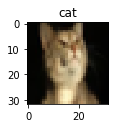

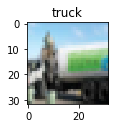

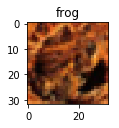

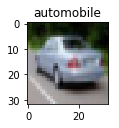

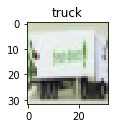

In [4]:
label_to_name = ['airplane', 'automobile', 'bird', 'cat', 'deer' , 'dog', 'frog', 'horse', 'ship', 'truck']
indeces = random.sample(range(0, train_samples.shape[0]), 5)
# TODO plot 5 training samples
for index in indeces:
    plt.figure(figsize=(1.5,1.5))
    plt.title(label_to_name[train_labels[index]])
    plt.imshow(train_samples[index])




## Building Tensorflow Graph

In [5]:
HEIGHT = 32
WIDTH = 32
CHANNELS = 3
NUM_CLASSES = 10

# You can also modify these hyper-parameters (batch_size, epochs)
# e.g. Add more epochs, if not converged. Reduce batch_size if too big for your GPU memory
batch_size = 50  
num_train_epochs = 100
steps_per_epoch = int( train_samples.shape[0] / batch_size)

In [6]:
# TODO define placeholders for the inputs and their labels (hint: what is their type, shape?)

inputs = tf.placeholder(tf.float32,name='input',shape=[batch_size,WIDTH,HEIGHT,CHANNELS])
labels = tf.placeholder(tf.int32,name='output',shape=[batch_size])

logits = buildNetwork(inputs, batch_size)

## Task: Build the Loss. Add weight regularization.

In [7]:
# TODO add an appropriate cross entropy loss function
loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels,logits=logits,name='crossEntropy')

# TODO use reduce_mean to combine the single loss values from all the different input samples
meanLoss= tf.reduce_mean(loss)

# TODO add L2 regularization
alpha=0.01
tvars =tf.trainable_variables()
l2_reg = tf.reduce_sum([tf.nn.l2_loss(var) for var in tvars])
loss = meanLoss+alpha*l2_reg
# hint: use tf.trainable_variables() and tf.nn.l2_loss(var)


In [8]:
# Compute accuracy as an evaluation metric
predictions = tf.to_int32(tf.argmax(logits, axis=1))
correct_mask = tf.to_float(tf.equal(predictions, labels))
accuracy = tf.reduce_mean(correct_mask)

## Task: Define Learning Rate, Optimizer and Training Operation

In [9]:
# TODO define the learning rate
learningRate = 0.1
# TODO define the optimizer (experiment with different options)
opt = tf.train.GradientDescentOptimizer(learning_rate=learningRate)
# TODO build the corresponding training operation
opt_op = opt.minimize(loss)

In [10]:
# Define summary operations. Note, that the names may vary depending on how you defined variables!

train_summaries = [
  tf.summary.scalar('train_loss', loss),
  tf.summary.scalar('train_accuracy', accuracy)
]
train_summary_op = tf.summary.merge(train_summaries)

val_accuracy = tf.placeholder(tf.float32)
val_summary_op = tf.summary.scalar('val_accuracy', val_accuracy)

# Define a single summary writer, which will take care of writing
# our summary representations to disk.
writer = tf.summary.FileWriter('log')

## Task: Initialize the variables

In [11]:
# TODO use the variables initializer to build the operation and run it in the current session (named sess)
model = tf.global_variables_initializer()
sess.run(model)

##  Task: Train your network. Display the progress. 

In [ ]:
def gen_data(source,indices):
    while True:
        for i in indices:
            image = source[0][i]
            label = source[1][i]
            yield image, label


def gen_data_batch(source,batchSize,samples_indices):
    data_gen = gen_data(source,samples_indices)
    #for i in range(numberOfBatches):
    while(True):
        images_batch = []
        labels_batch = []
        for _ in range(batchSize):
            img, label = next(data_gen)
            images_batch.append(img)
            #plt.figure(figsize=(1.5,1.5))
            #plt.title(label_to_name[label])
            #plt.imshow(img)
            labels_batch.append(label)
        #print("batch served!")
        yield np.array(images_batch),np.asarray(labels_batch)

c:\users\ahmad\appdata\local\programs\python\python35\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!
batch served!


KeyboardInterrupt: 

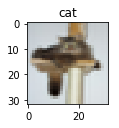

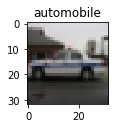

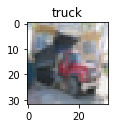

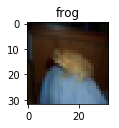

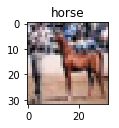

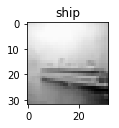

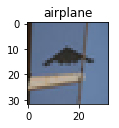

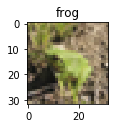

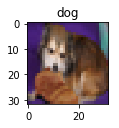

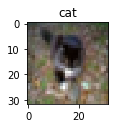

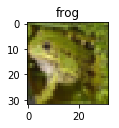

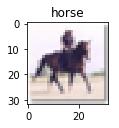

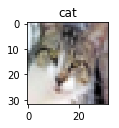

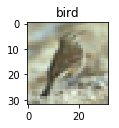

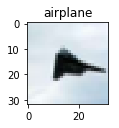

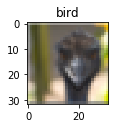

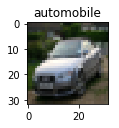

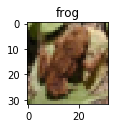

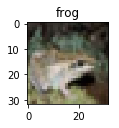

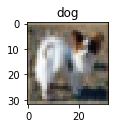

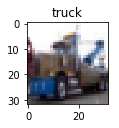

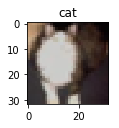

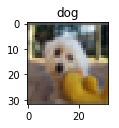

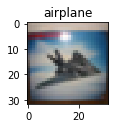

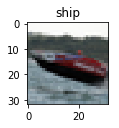

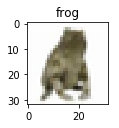

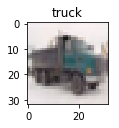

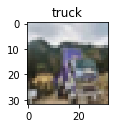

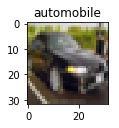

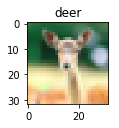

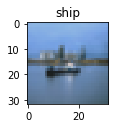

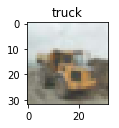

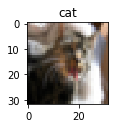

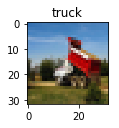

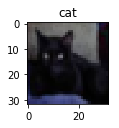

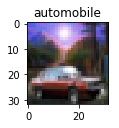

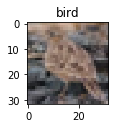

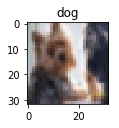

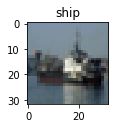

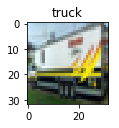

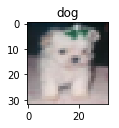

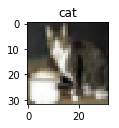

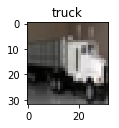

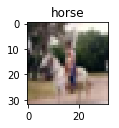

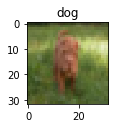

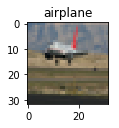

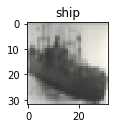

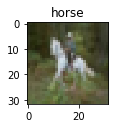

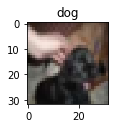

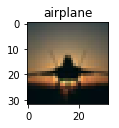

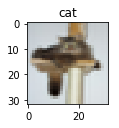

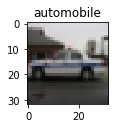

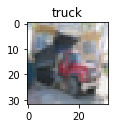

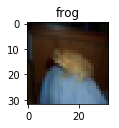

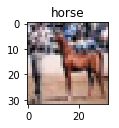

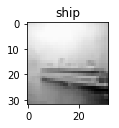

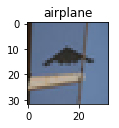

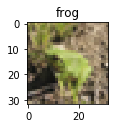

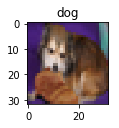

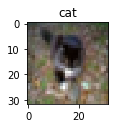

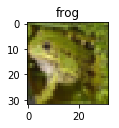

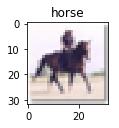

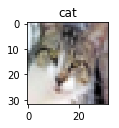

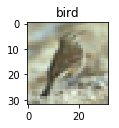

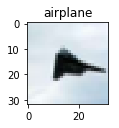

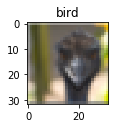

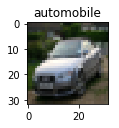

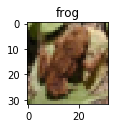

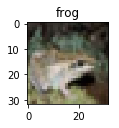

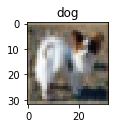

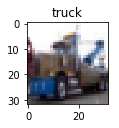

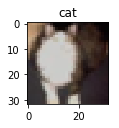

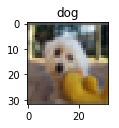

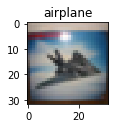

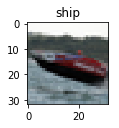

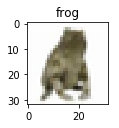

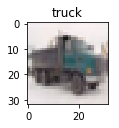

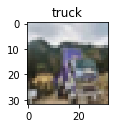

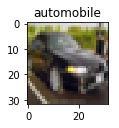

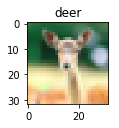

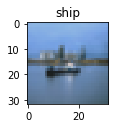

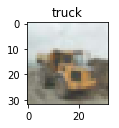

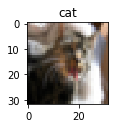

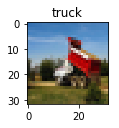

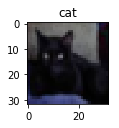

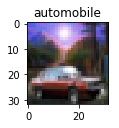

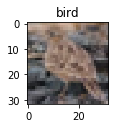

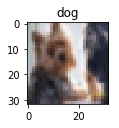

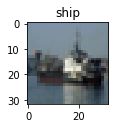

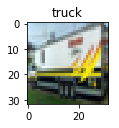

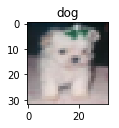

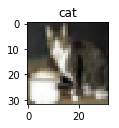

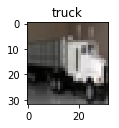

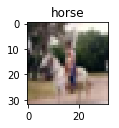

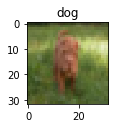

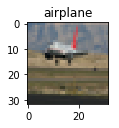

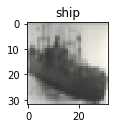

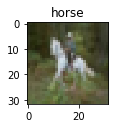

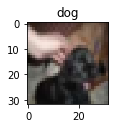

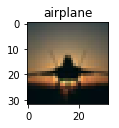

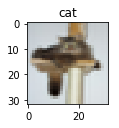

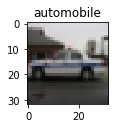

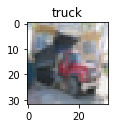

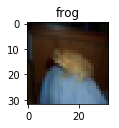

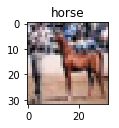

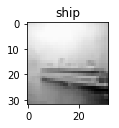

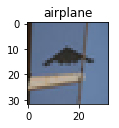

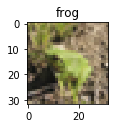

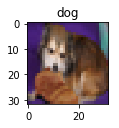

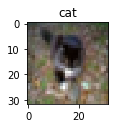

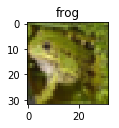

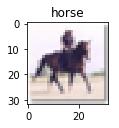

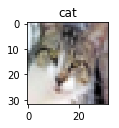

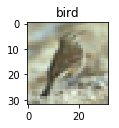

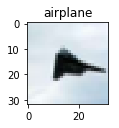

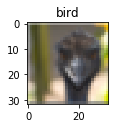

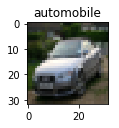

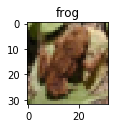

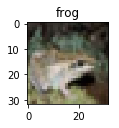

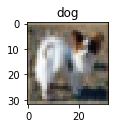

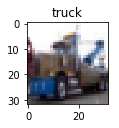

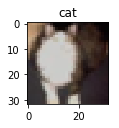

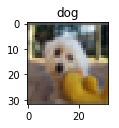

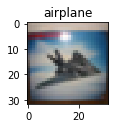

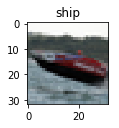

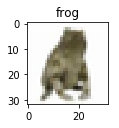

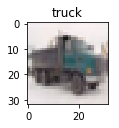

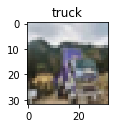

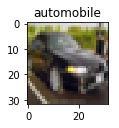

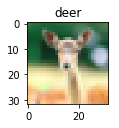

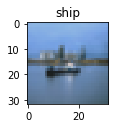

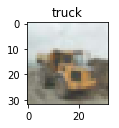

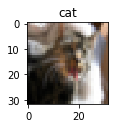

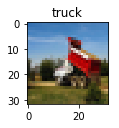

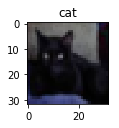

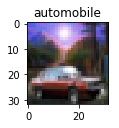

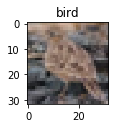

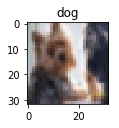

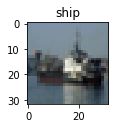

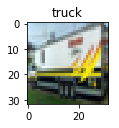

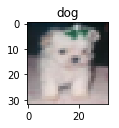

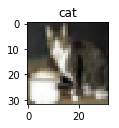

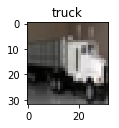

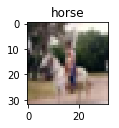

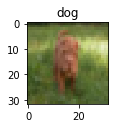

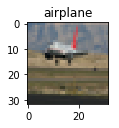

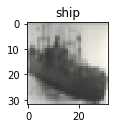

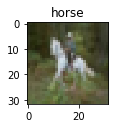

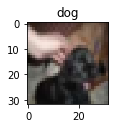

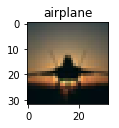

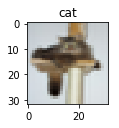

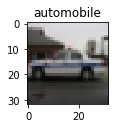

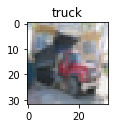

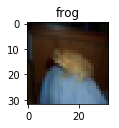

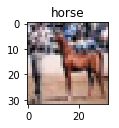

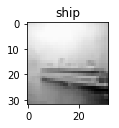

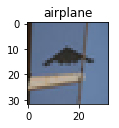

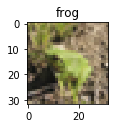

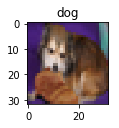

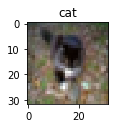

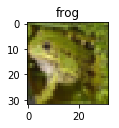

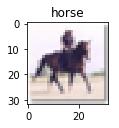

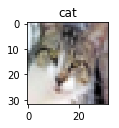

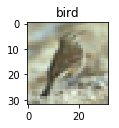

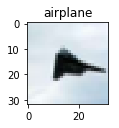

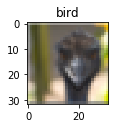

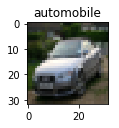

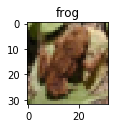

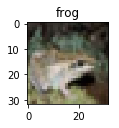

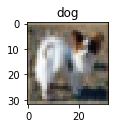

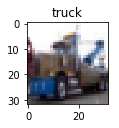

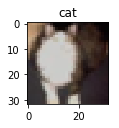

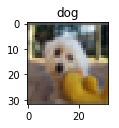

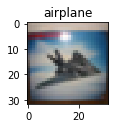

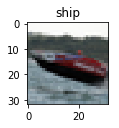

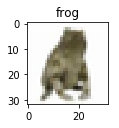

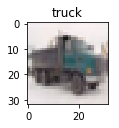

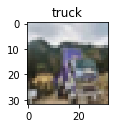

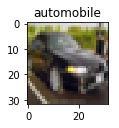

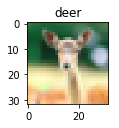

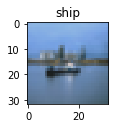

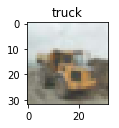

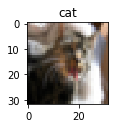

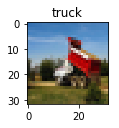

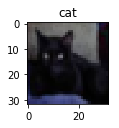

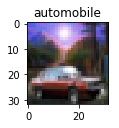

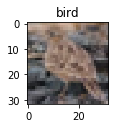

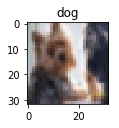

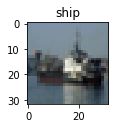

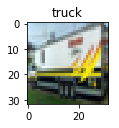

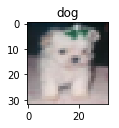

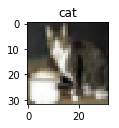

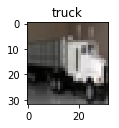

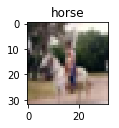

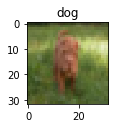

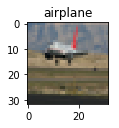

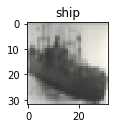

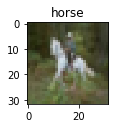

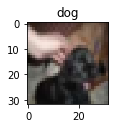

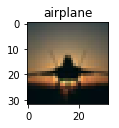

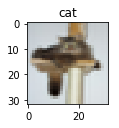

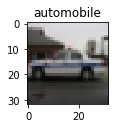

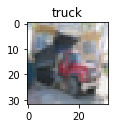

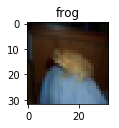

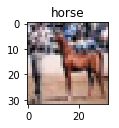

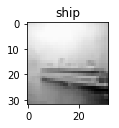

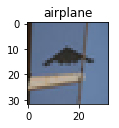

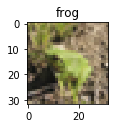

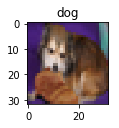

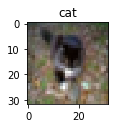

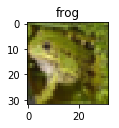

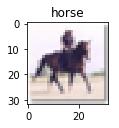

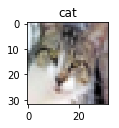

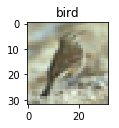

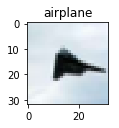

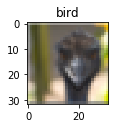

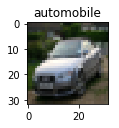

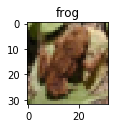

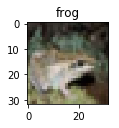

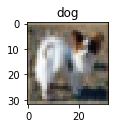

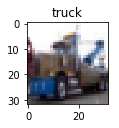

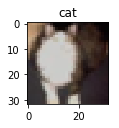

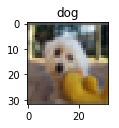

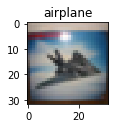

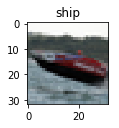

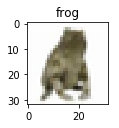

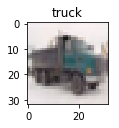

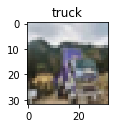

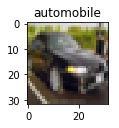

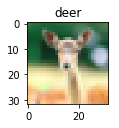

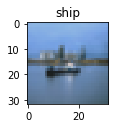

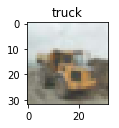

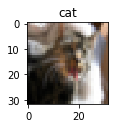

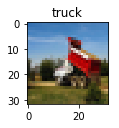

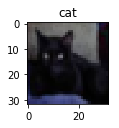

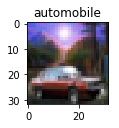

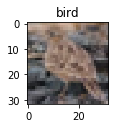

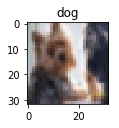

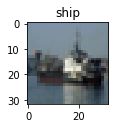

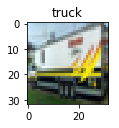

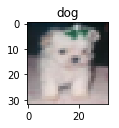

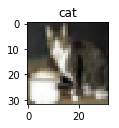

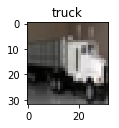

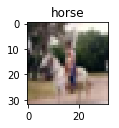

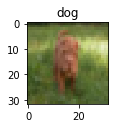

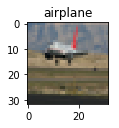

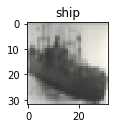

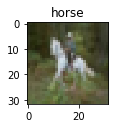

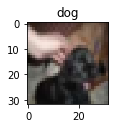

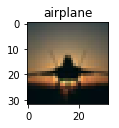

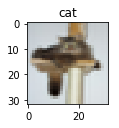

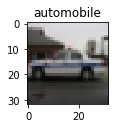

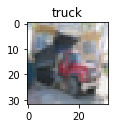

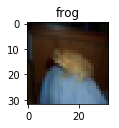

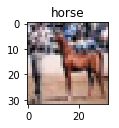

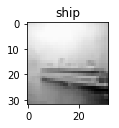

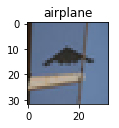

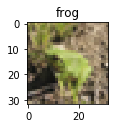

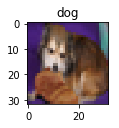

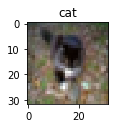

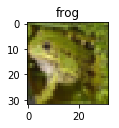

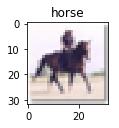

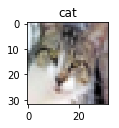

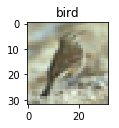

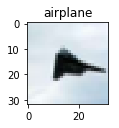

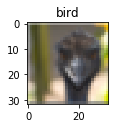

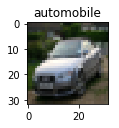

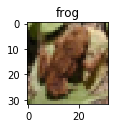

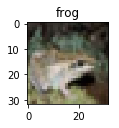

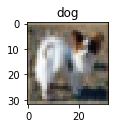

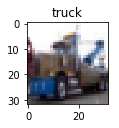

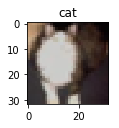

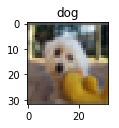

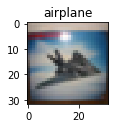

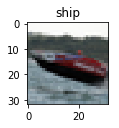

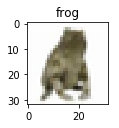

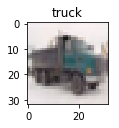

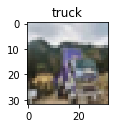

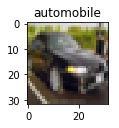

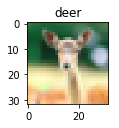

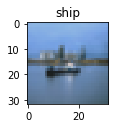

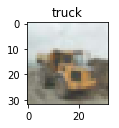

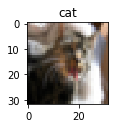

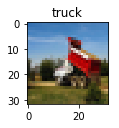

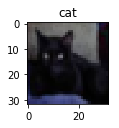

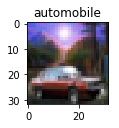

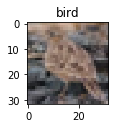

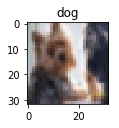

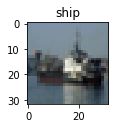

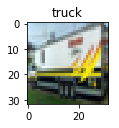

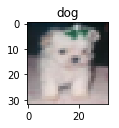

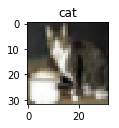

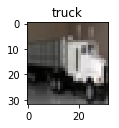

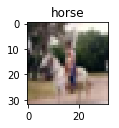

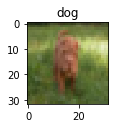

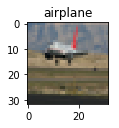

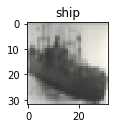

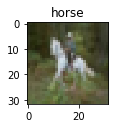

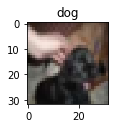

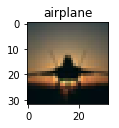

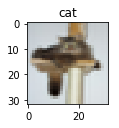

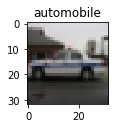

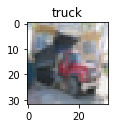

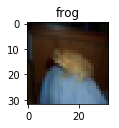

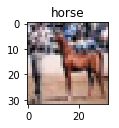

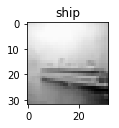

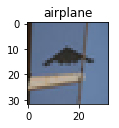

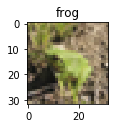

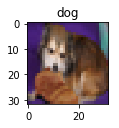

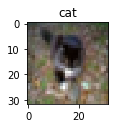

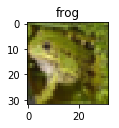

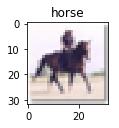

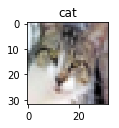

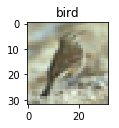

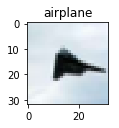

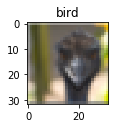

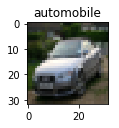

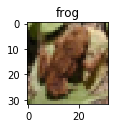

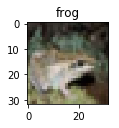

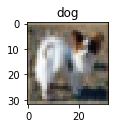

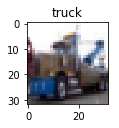

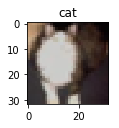

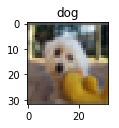

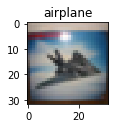

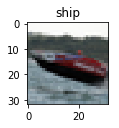

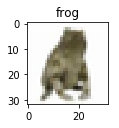

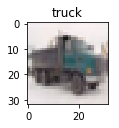

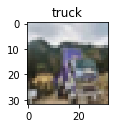

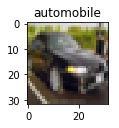

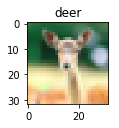

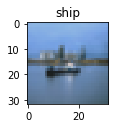

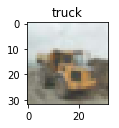

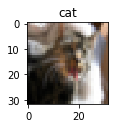

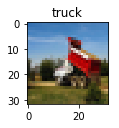

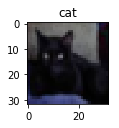

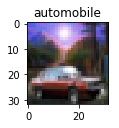

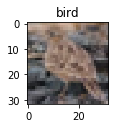

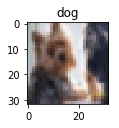

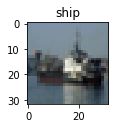

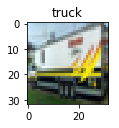

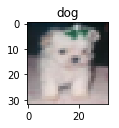

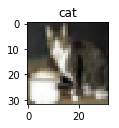

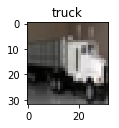

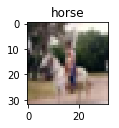

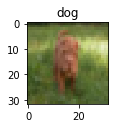

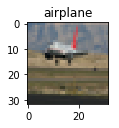

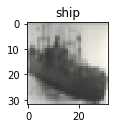

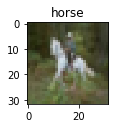

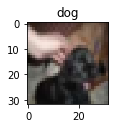

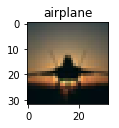

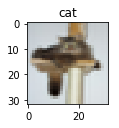

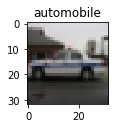

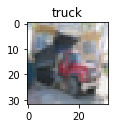

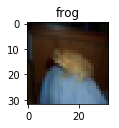

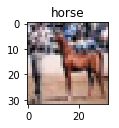

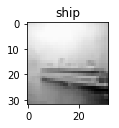

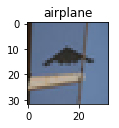

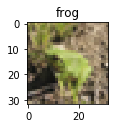

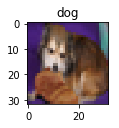

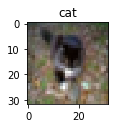

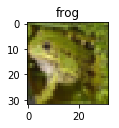

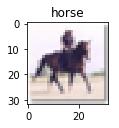

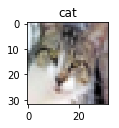

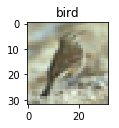

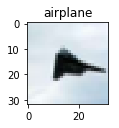

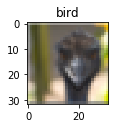

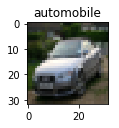

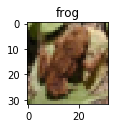

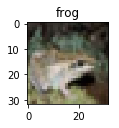

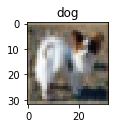

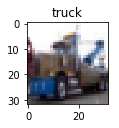

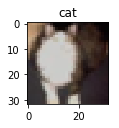

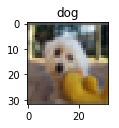

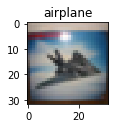

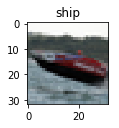

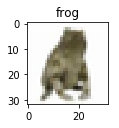

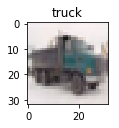

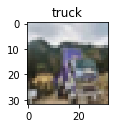

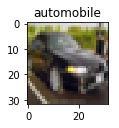

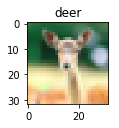

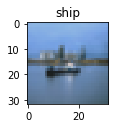

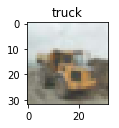

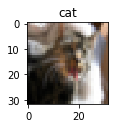

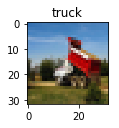

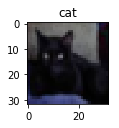

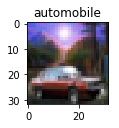

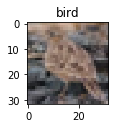

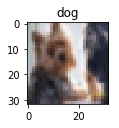

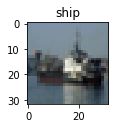

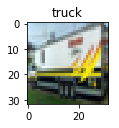

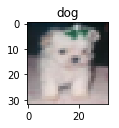

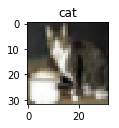

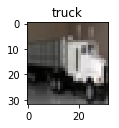

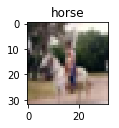

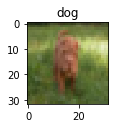

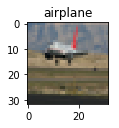

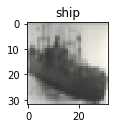

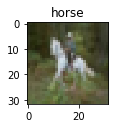

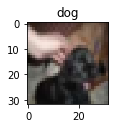

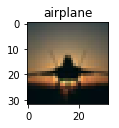

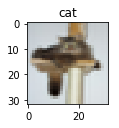

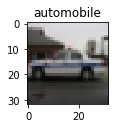

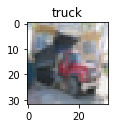

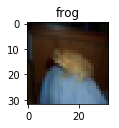

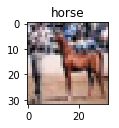

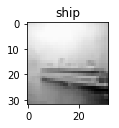

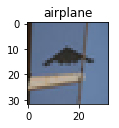

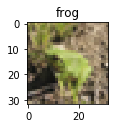

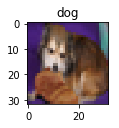

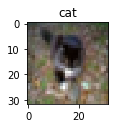

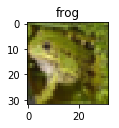

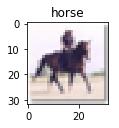

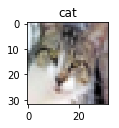

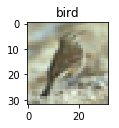

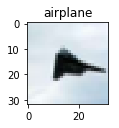

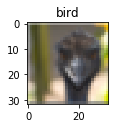

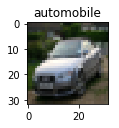

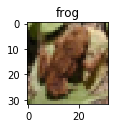

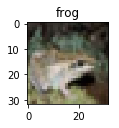

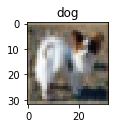

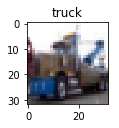

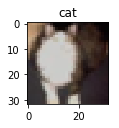

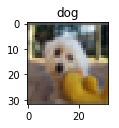

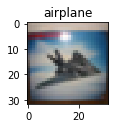

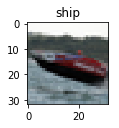

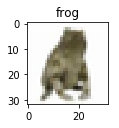

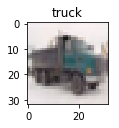

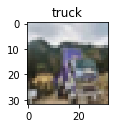

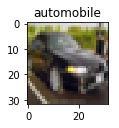

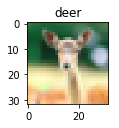

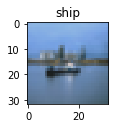

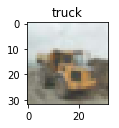

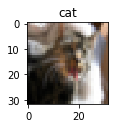

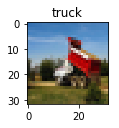

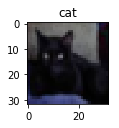

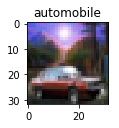

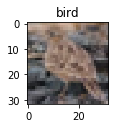

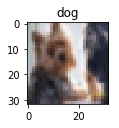

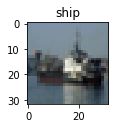

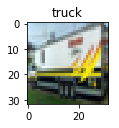

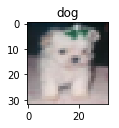

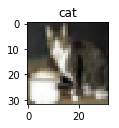

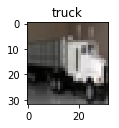

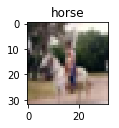

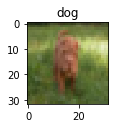

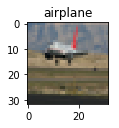

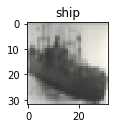

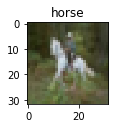

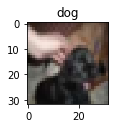

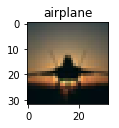

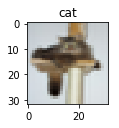

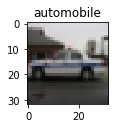

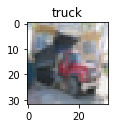

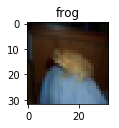

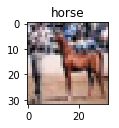

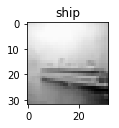

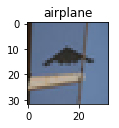

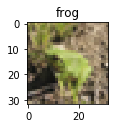

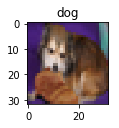

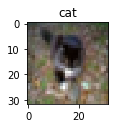

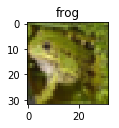

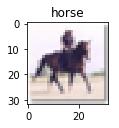

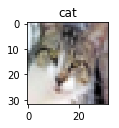

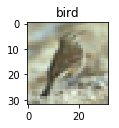

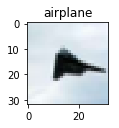

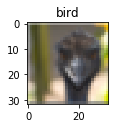

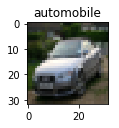

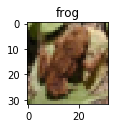

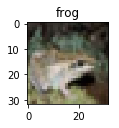

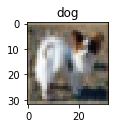

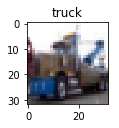

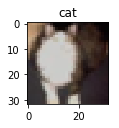

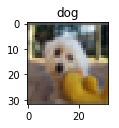

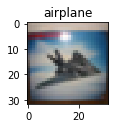

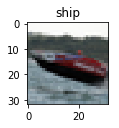

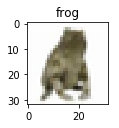

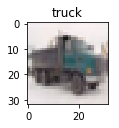

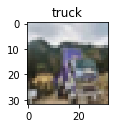

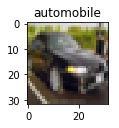

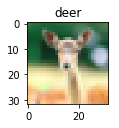

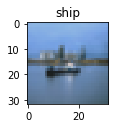

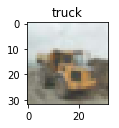

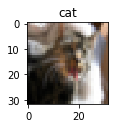

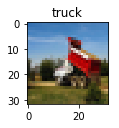

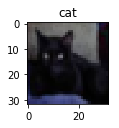

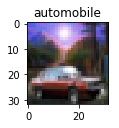

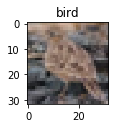

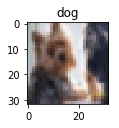

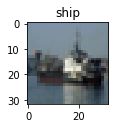

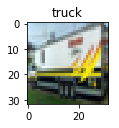

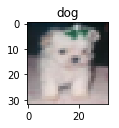

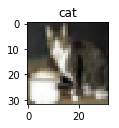

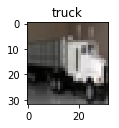

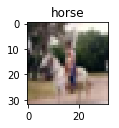

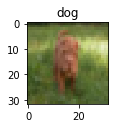

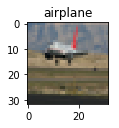

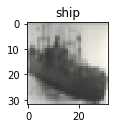

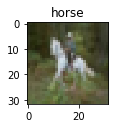

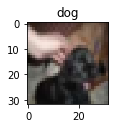

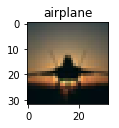

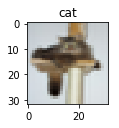

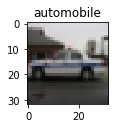

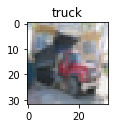

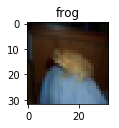

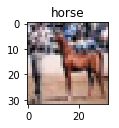

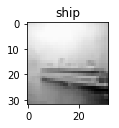

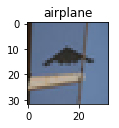

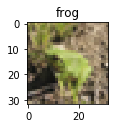

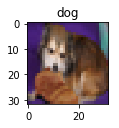

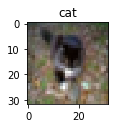

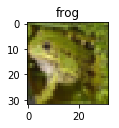

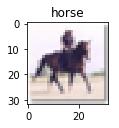

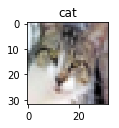

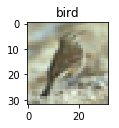

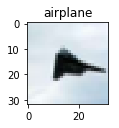

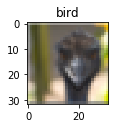

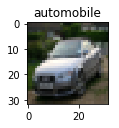

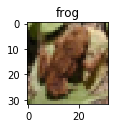

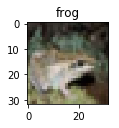

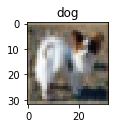

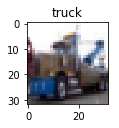

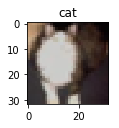

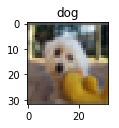

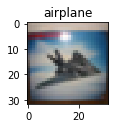

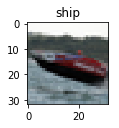

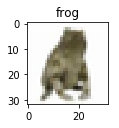

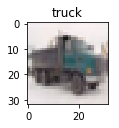

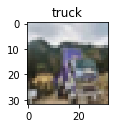

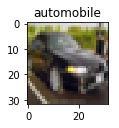

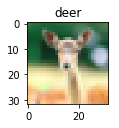

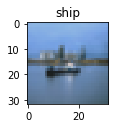

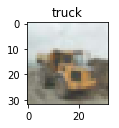

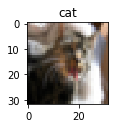

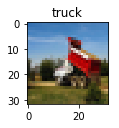

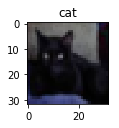

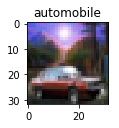

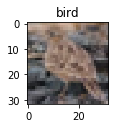

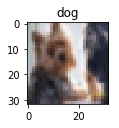

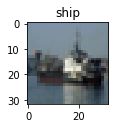

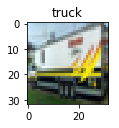

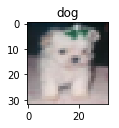

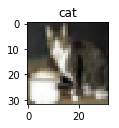

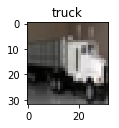

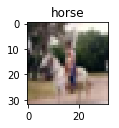

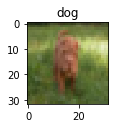

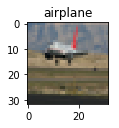

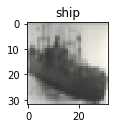

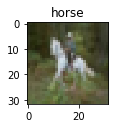

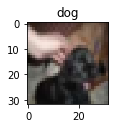

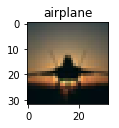

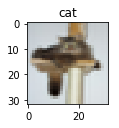

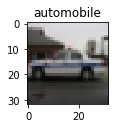

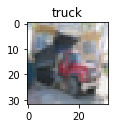

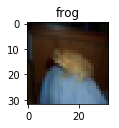

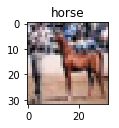

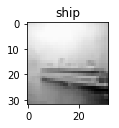

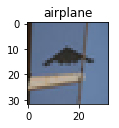

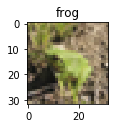

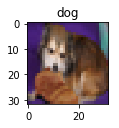

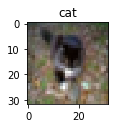

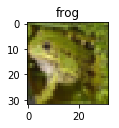

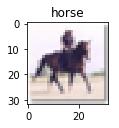

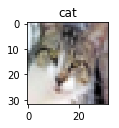

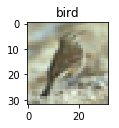

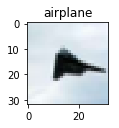

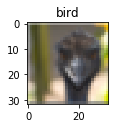

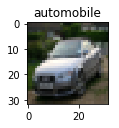

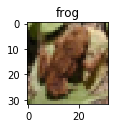

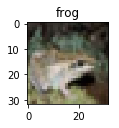

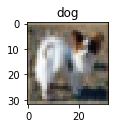

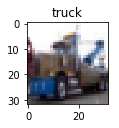

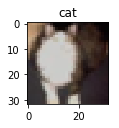

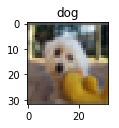

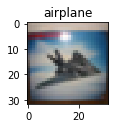

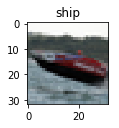

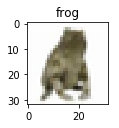

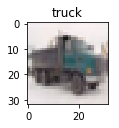

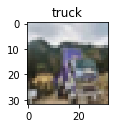

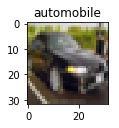

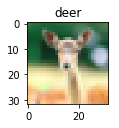

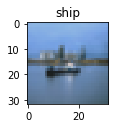

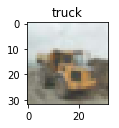

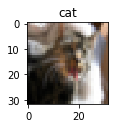

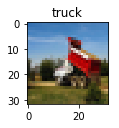

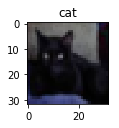

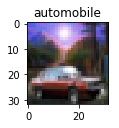

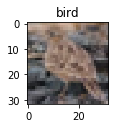

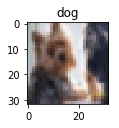

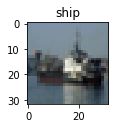

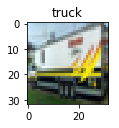

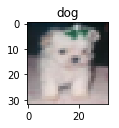

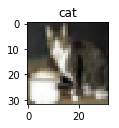

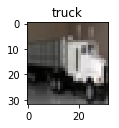

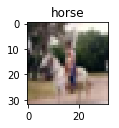

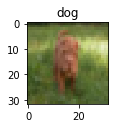

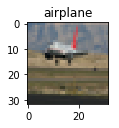

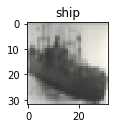

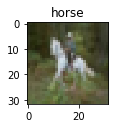

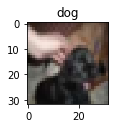

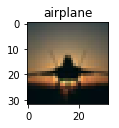

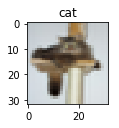

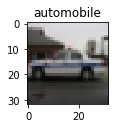

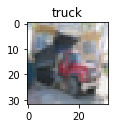

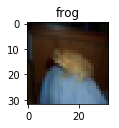

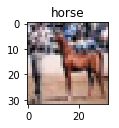

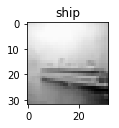

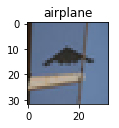

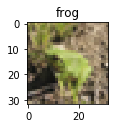

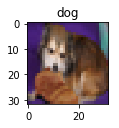

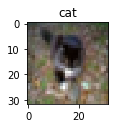

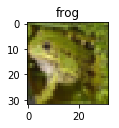

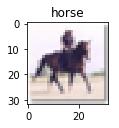

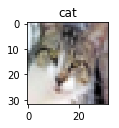

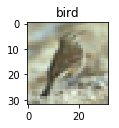

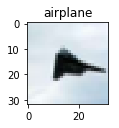

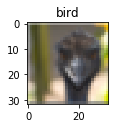

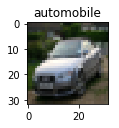

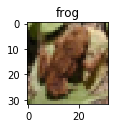

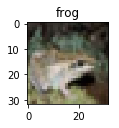

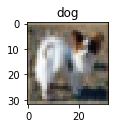

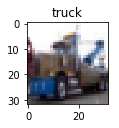

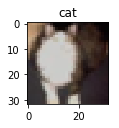

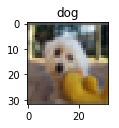

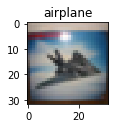

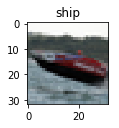

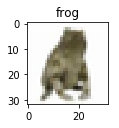

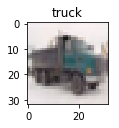

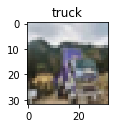

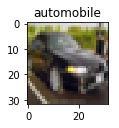

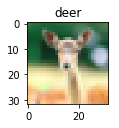

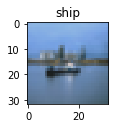

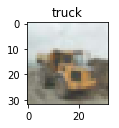

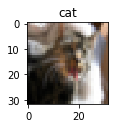

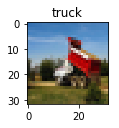

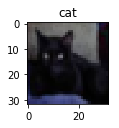

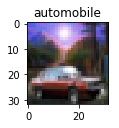

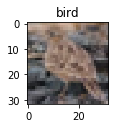

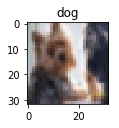

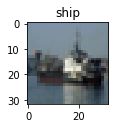

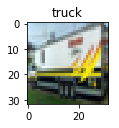

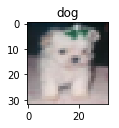

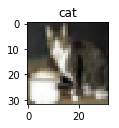

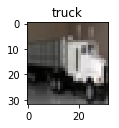

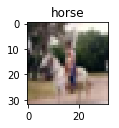

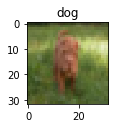

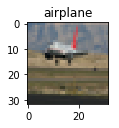

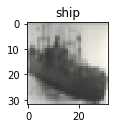

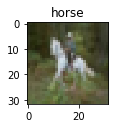

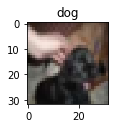

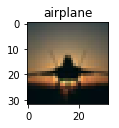

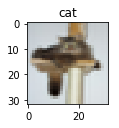

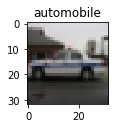

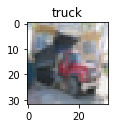

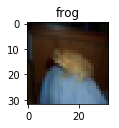

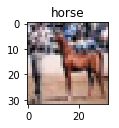

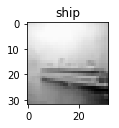

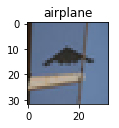

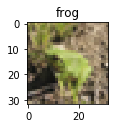

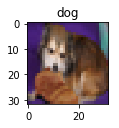

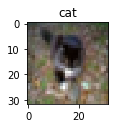

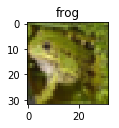

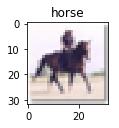

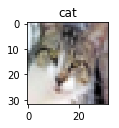

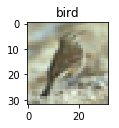

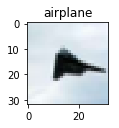

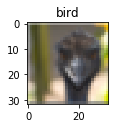

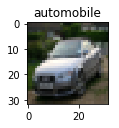

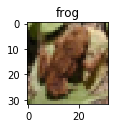

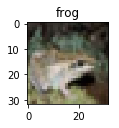

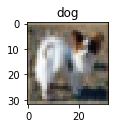

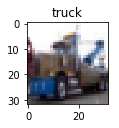

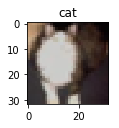

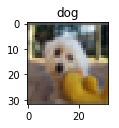

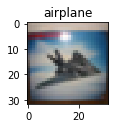

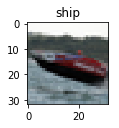

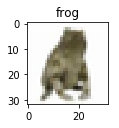

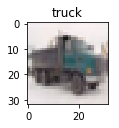

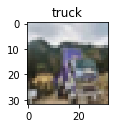

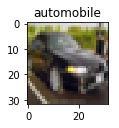

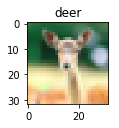

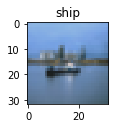

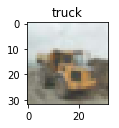

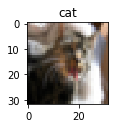

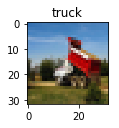

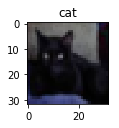

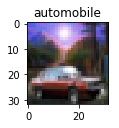

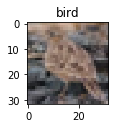

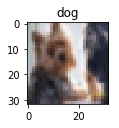

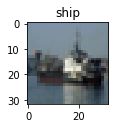

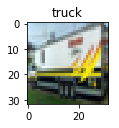

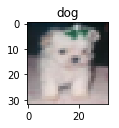

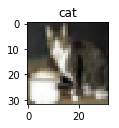

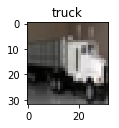

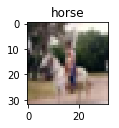

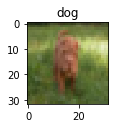

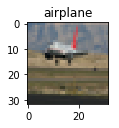

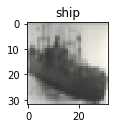

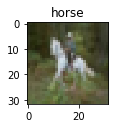

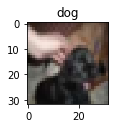

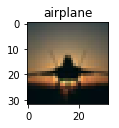

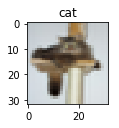

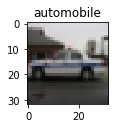

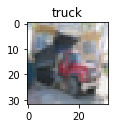

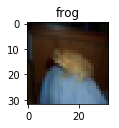

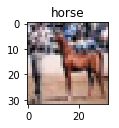

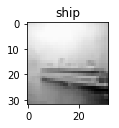

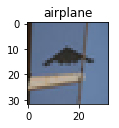

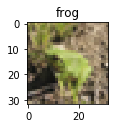

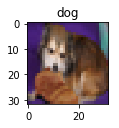

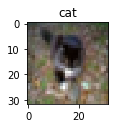

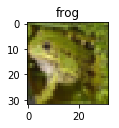

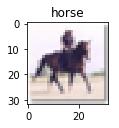

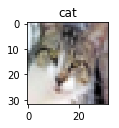

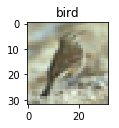

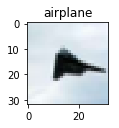

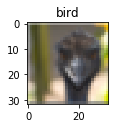

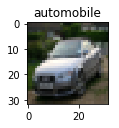

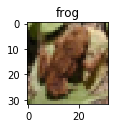

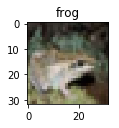

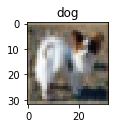

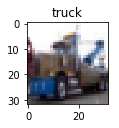

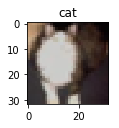

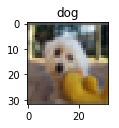

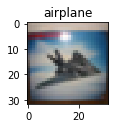

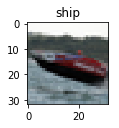

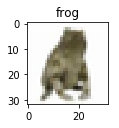

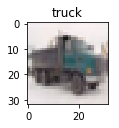

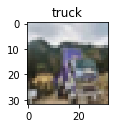

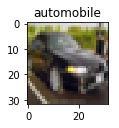

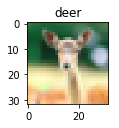

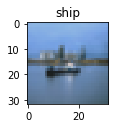

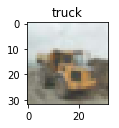

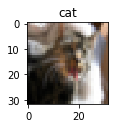

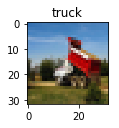

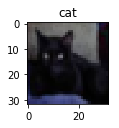

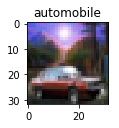

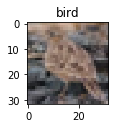

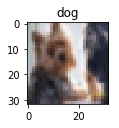

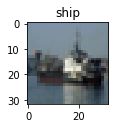

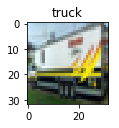

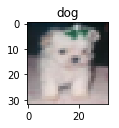

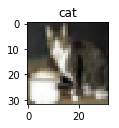

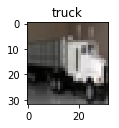

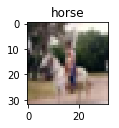

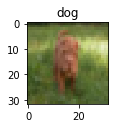

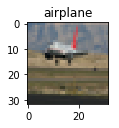

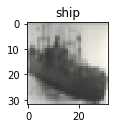

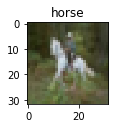

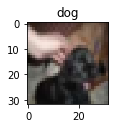

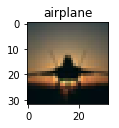

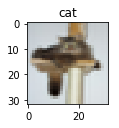

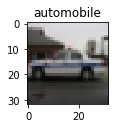

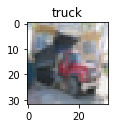

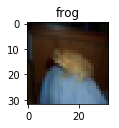

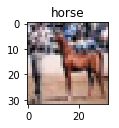

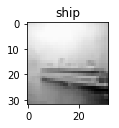

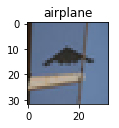

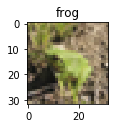

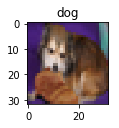

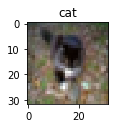

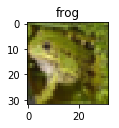

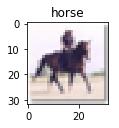

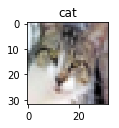

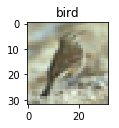

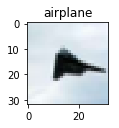

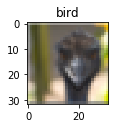

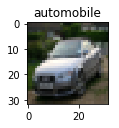

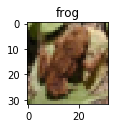

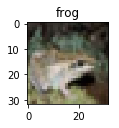

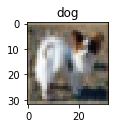

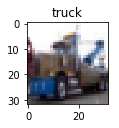

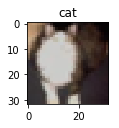

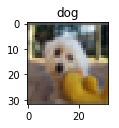

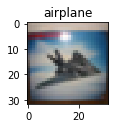

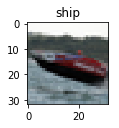

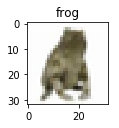

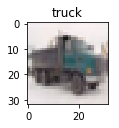

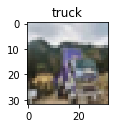

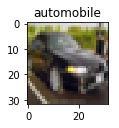

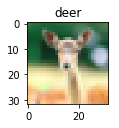

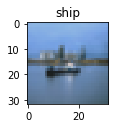

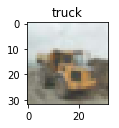

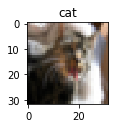

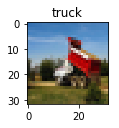

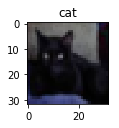

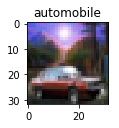

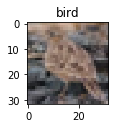

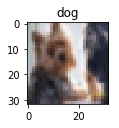

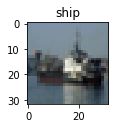

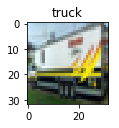

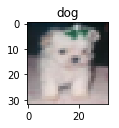

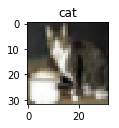

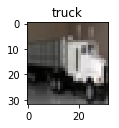

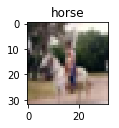

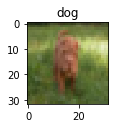

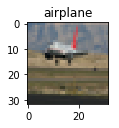

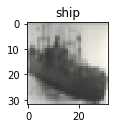

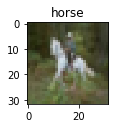

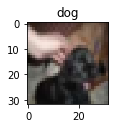

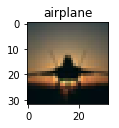

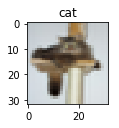

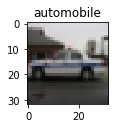

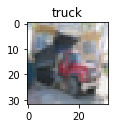

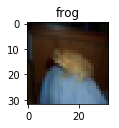

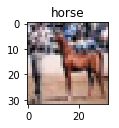

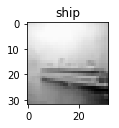

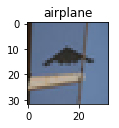

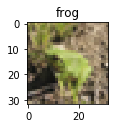

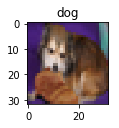

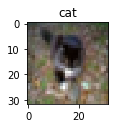

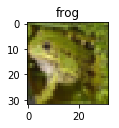

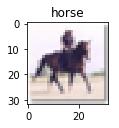

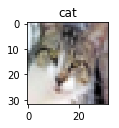

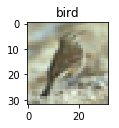

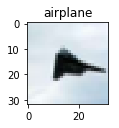

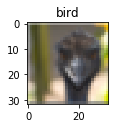

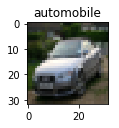

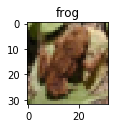

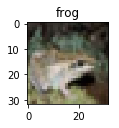

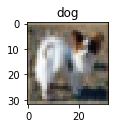

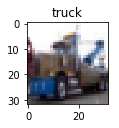

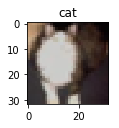

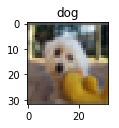

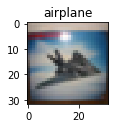

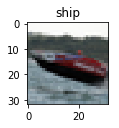

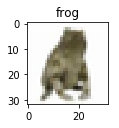

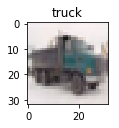

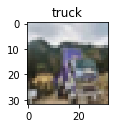

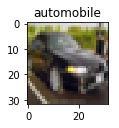

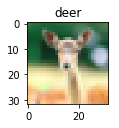

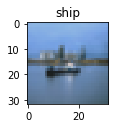

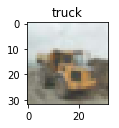

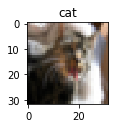

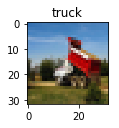

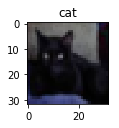

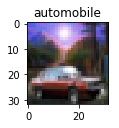

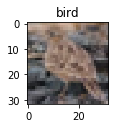

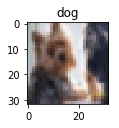

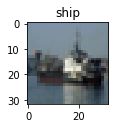

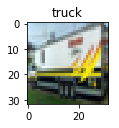

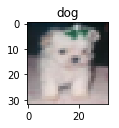

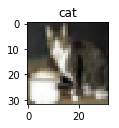

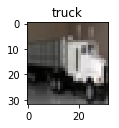

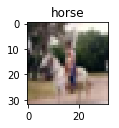

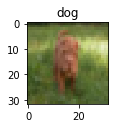

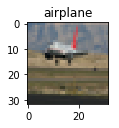

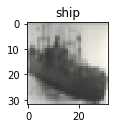

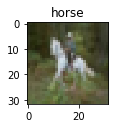

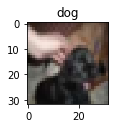

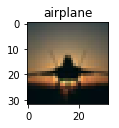

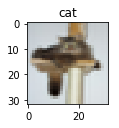

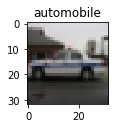

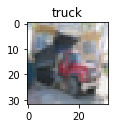

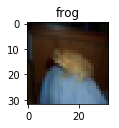

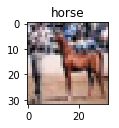

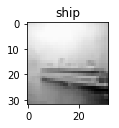

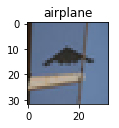

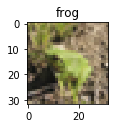

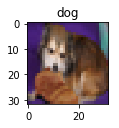

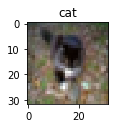

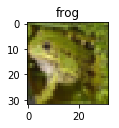

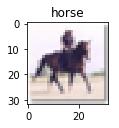

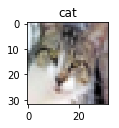

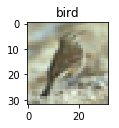

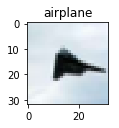

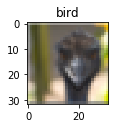

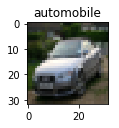

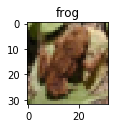

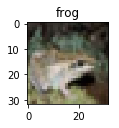

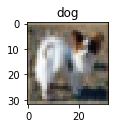

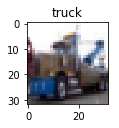

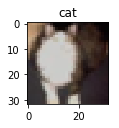

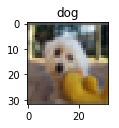

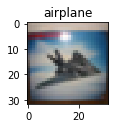

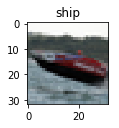

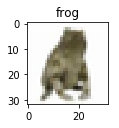

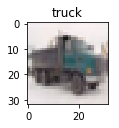

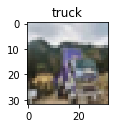

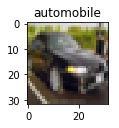

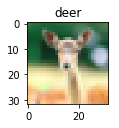

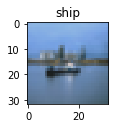

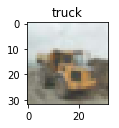

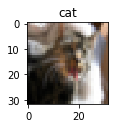

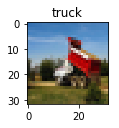

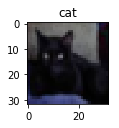

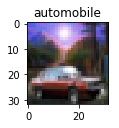

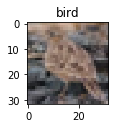

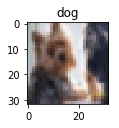

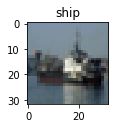

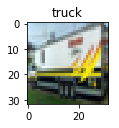

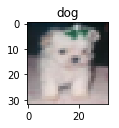

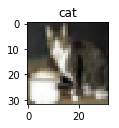

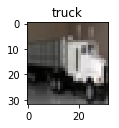

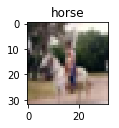

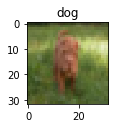

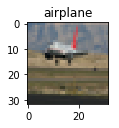

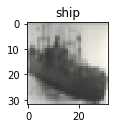

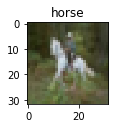

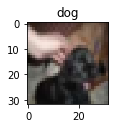

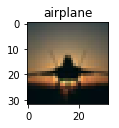

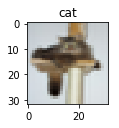

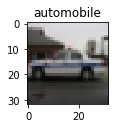

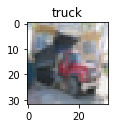

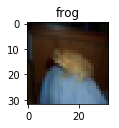

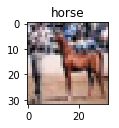

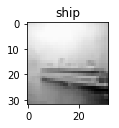

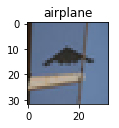

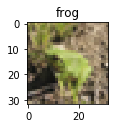

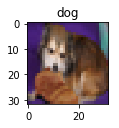

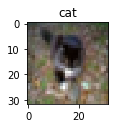

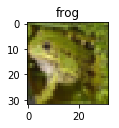

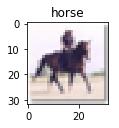

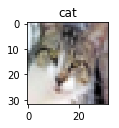

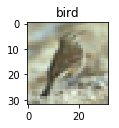

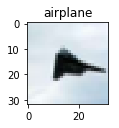

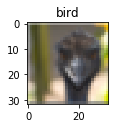

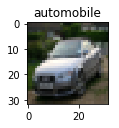

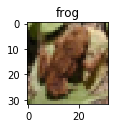

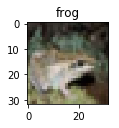

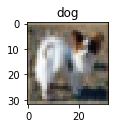

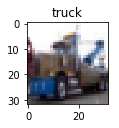

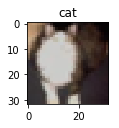

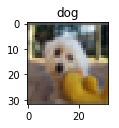

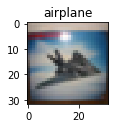

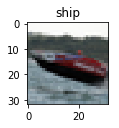

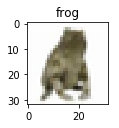

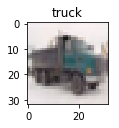

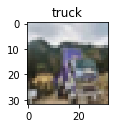

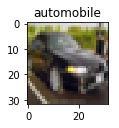

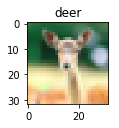

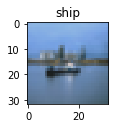

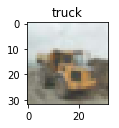

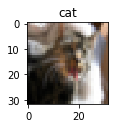

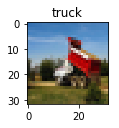

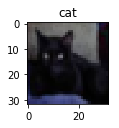

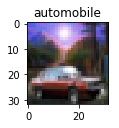

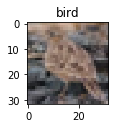

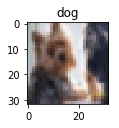

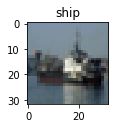

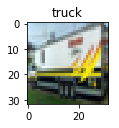

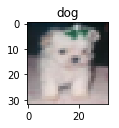

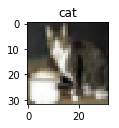

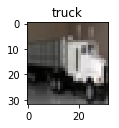

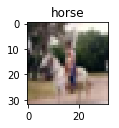

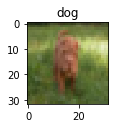

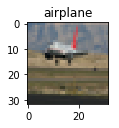

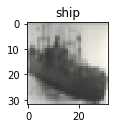

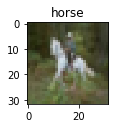

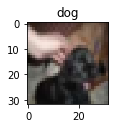

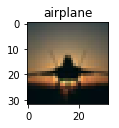

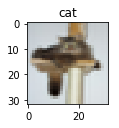

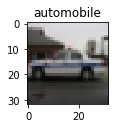

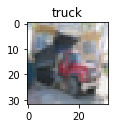

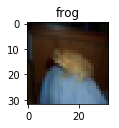

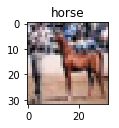

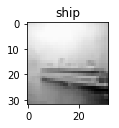

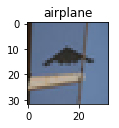

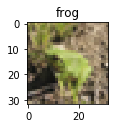

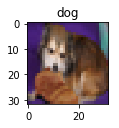

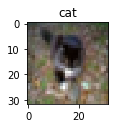

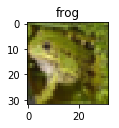

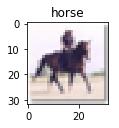

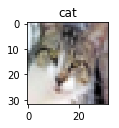

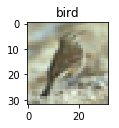

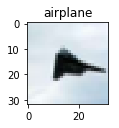

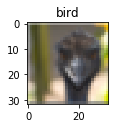

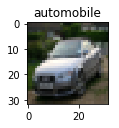

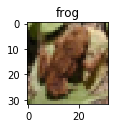

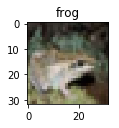

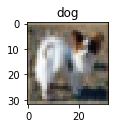

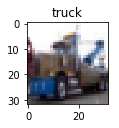

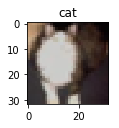

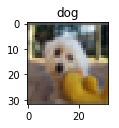

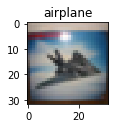

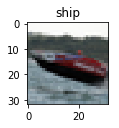

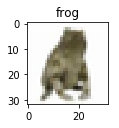

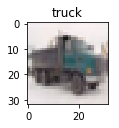

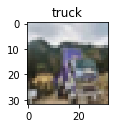

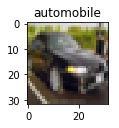

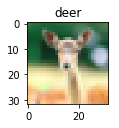

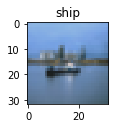

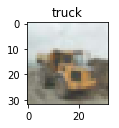

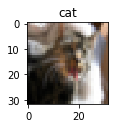

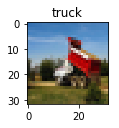

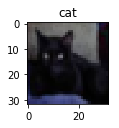

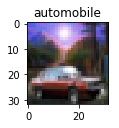

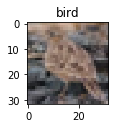

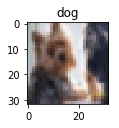

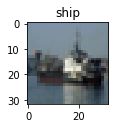

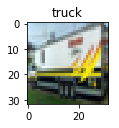

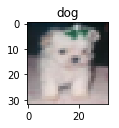

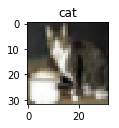

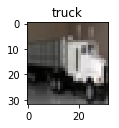

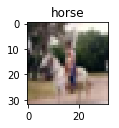

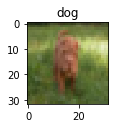

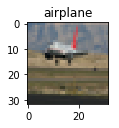

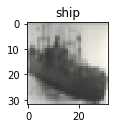

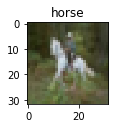

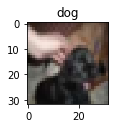

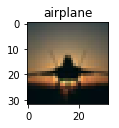

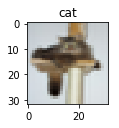

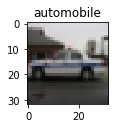

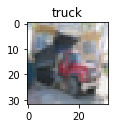

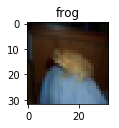

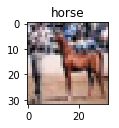

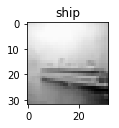

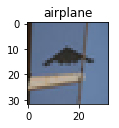

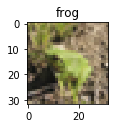

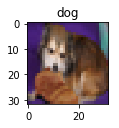

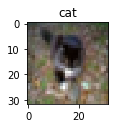

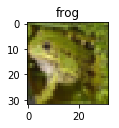

In [ ]:
# indicators on how often to create a summary
num_steps_per_train_summary = 25  

# TODO run num_train_steps iterations on the training samples each of batchsize 50
samples_indices = list(range(train_samples.shape[0]))
for epoch in range(num_train_epochs):
    #print("epoch")
    #print(epoch)
    
    
    # TODO randomly shuffle training samples
    random.shuffle(samples_indices)
    for iteration in range(steps_per_epoch):
        #print('iter')
        #print(iter)
        # TODO read the batch and execute one iteration of the graph 
        Xs,Ys = next(gen_data_batch([train_samples,train_labels],batch_size,samples_indices))
            
        summary  =  sess.run(opt_op, feed_dict={inputs: Xs, labels: Ys})

    
    
        # TODO every num_steps_per_train_summary iterations: 
        #     save the current training status (loss and accuracy) to tensorboard
        if epoch % num_steps_per_train_summary==0:
            writer.add_summary(summary, global_step=epoch)
            
    
    writer.add_summary(summary, global_step=epoch)
    # TODO every epoch: 
    #     save the current validation accuracy to tensorboard
    # Note: we are interested in the accuracy over the *entire* validation set, not just the current batch


## Task: Save the trained model into checkpoints

In [14]:
# TODO use tf.train.Saver to save the trained model as checkpoints/model.ckpt
#{'tvars': tvars}
saver = tf.train.Saver()
saver.save(sess, 'checkpoints/model.ckpt')



'checkpoints/model.ckpt'

## Bonus Exercise: Use different methods to further improve your accuracy. 
### e.g. De-mean input, use data Augmentation (flip image, rotate image, add noise), add dropout ... 

In [ ]:
# Hint: tf.nn.dropout, tf.image.flip_left_right, .... 
# Note that this should only be applied during training and not during testing!! 
# Hint: Use an extra tf.placeholder to indicate if training.
